# Return on Investment (ROI) anlalysis  for Sussex Budget Productions based on IMDB data

## Overview Of The Report:

Sussex Budget Productions company invested £500K and collected only £100K in the last movie they produced, which is basically -80% of Return on Investment (ROI).

Business Question for this report:
How can we improve this Return on Investment and keep the company in business?

To be able to answer this question, we have to perform an analysis that gives us evidence that what type of movies will do better performance, since they did "comedy-action-thriller" genre movie and it got failed to collect the invested money itself at the box office.

Now the company is ready to raise a £1.5 million budget by convincing investors and it must be returned good ROI and keep the company in business after a loss.

In this report:

I will be performing the Exploratory data analysis (EDA), this analysis will allow us to do data wrangling and data cleaning so that we can use the cleaned version of the data file for the analysis. Then I will be performing a natural hypothesis based on the selected data to find the evidence to decide on the next movie production which is getting statistically significant of the variables we test.

After performing all the Exploratory data analysis and hypothesis tests, I can conclude the next best actions to take and achieve a good return on investment. With this conclusion, I can be able to answer the business question for this report.

In [1]:
#standard python libraries to work on data in this report.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

 ## Exploratory Data Analysis:

After all the libraries are imported, I will be reading the IMDB data and performing the exploratory data analysis like checking the nulls, and unique values and cleaning the unwanted records, etc. So let's begin with the data cleaning.

In [2]:
datafile=pd.read_csv('movie_metadata.csv') #Loading the data to a dataframe
datafile.head() #Viewing the data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
datafile.info() #Checking all the basic information related to our IMDB data file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
datafile.duplicated().sum() #Number of duplicate records in the given file. Here we got 45

45

In [5]:
datafile.genres.unique() # It will give us unique genres

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
       'Action|Adventure|Thriller', 'Action|Thriller', 'Documentary',
       'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
       'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
       'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
       'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
       'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
       'Adventure|Fantasy', 'Action|Adventure|Drama|History',
       'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
       'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy|Romance',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Adventure|Animation|Comedy|Family|Fantasy',
       'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
       'Action|Adventure|Horror|Sci-Fi|Thriller',
       'Adventure|Animation|Family|Sci-Fi',
       'Action|Comedy|Crime|Thrille

<AxesSubplot:>

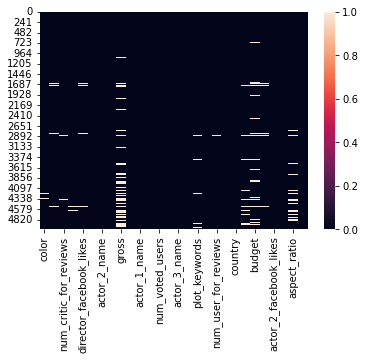

In [6]:
datafile.isnull().sum() 
sns.heatmap(datafile.isnull())#number of nulls available in this file and can be shown in heatmap

Loaded IMDB data to a data frame called datafile and we have a total of 5043 records in it. during the process of data wrangling, I found the null values and 45 duplicate records. Also the unique movie genres. The above heatmap shows the distribution of null values across the columns so we have to do data cleaning before using it for the actual analysis of data.

<AxesSubplot:>

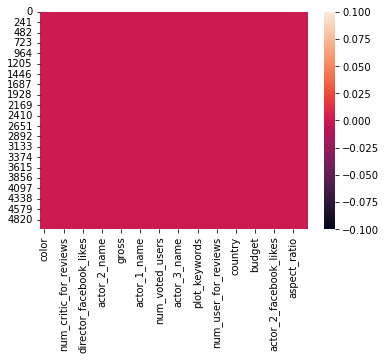

In [7]:
datafile.replace(np.nan,0,inplace = True) # it will replace null/not an number values with 0.
sns.heatmap(datafile.isnull()) #now ensure the null values.

In [8]:
datafile.drop_duplicates(subset=None, inplace=True) #it will remove the the duplicates.
datafile.duplicated().sum()# Rechecking duplicate value counts

0

I will be replacing the null values with 0 since null values in data always depreciate the results and also I will be dropping the duplicates so that we can have cleaned data.

In [9]:
columns=['genres','director_name','country','language','budget','gross','imdb_score','movie_title'] # I need only these for my further analyis so i am filtering the columns
Ndatafile=datafile[columns] #new data frame name for the file with customized columns

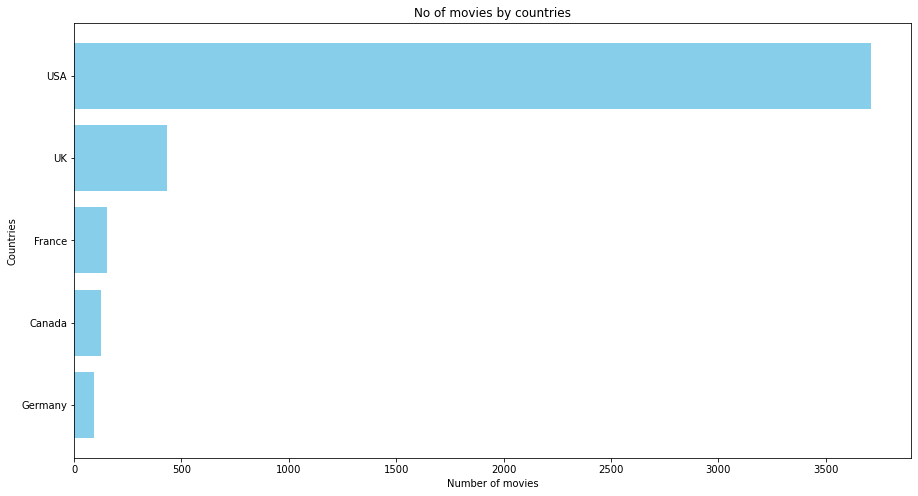

In [10]:
#Number of movies by countries plot
df_country=Ndatafile.groupby(['country']).agg({"movie_title":"nunique"}).reset_index().sort_values(by=['movie_title'],ascending=False)[:5] 
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['movie_title'],color=['skyblue'])
plt.xlabel('Number of movies')
plt.ylabel('Countries')
plt.title('No of movies by countries')
plt.show()

As we see in the above visualization, I have analyzed the number of movies created and produced in all the countries. In this, I have again plotted the top countries and got the USA market has the highest movies counts. So to target a specific market and get a good high ROI, I will be filtering the USA market further for my analysis.

In [11]:
Ndatafile = Ndatafile[Ndatafile['budget']!=0] #eliminating 0 from the budget
Ndatafile = Ndatafile[Ndatafile['gross']!=0] #eliminating 0 from the gross
Ndatafile = Ndatafile[Ndatafile['budget']<=1500000]  # restricting the budget value
Ndatafile = Ndatafile[Ndatafile['country']=='USA'] #Filtering the country here because we are targeting USA market


In [12]:
#new calculated metric fields to dataframe
Ndatafile["%ROI"]= ((Ndatafile["gross"]-Ndatafile["budget"])/ Ndatafile["budget"])
Ndatafile["Profit"]= (Ndatafile["gross"]-Ndatafile["budget"])

<AxesSubplot:>

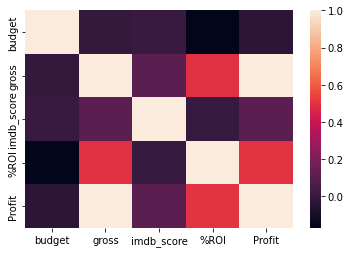

In [13]:
sns.heatmap(Ndatafile.corr()) #correlation between the parameters

The above heatmap shows the correlation between the parameters i.e between profit,%ROI,imdb_score, gross, and budget.

After selecting the specific columns, I will be adding data quality parameters to the file. These parameters are 
1)Removing the value 0 from the columns budget and gross because these 0 values lead to wrong insights. 
2)Since we have only a 1.5M budget, restricting the budget value to 1.5M (Budget≤1,500,000).
3)Here i have filtered a country (USA) to target the particular Market for better ROI.

budget, gross and imdb_score are metrics(facts) and genres,director_name, country, and language are dimensions, in addition to this, I will be adding 2 additional calculated metrics called % Return on investment(%ROI) and Profit(based on budget and gross).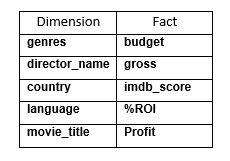

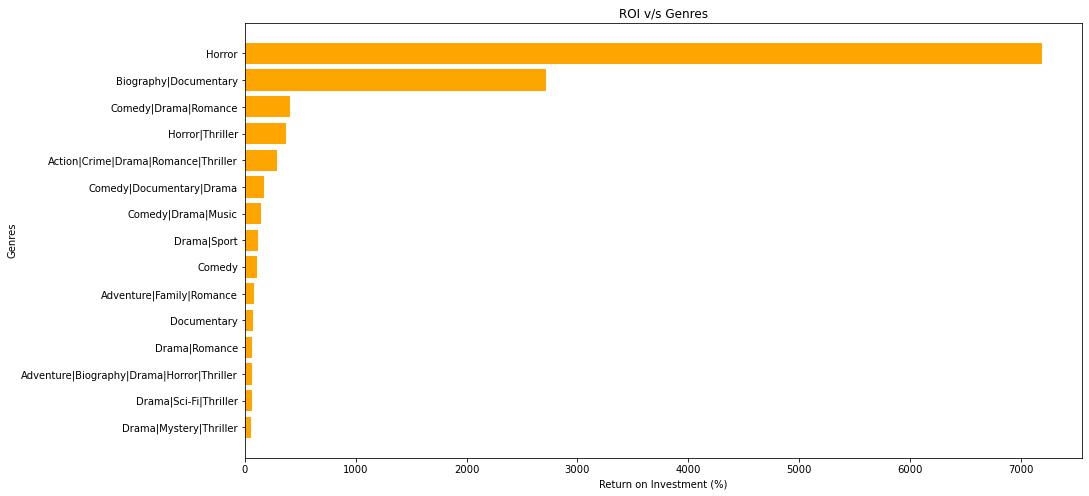

219

In [14]:
#ROI by genres plot
datafile_genre=Ndatafile.groupby(['genres']).agg({"%ROI":"max"}).reset_index().sort_values(by=['%ROI'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(datafile_genre[::-1]['genres'], datafile_genre[::-1]['%ROI'],color=['orange'])
plt.xlabel('Return on Investment (%)')
plt.ylabel('Genres')
plt.title('ROI v/s Genres')
plt.show()
Ndatafile.shape[0] #checking the number of samples/records in the dataframe

The above plot depicts that, the max Return on investment v/s genres. Above plot helps to identify the genres for the data analysis (based on max %ROI). Since we have less sample counts for the top 2 genres (6 and 1 respectively) and hence i have considered Comedy|Drama|Romance(15) genre for the further analysis.

In [15]:
Ndatafile = Ndatafile[Ndatafile['genres']=='Comedy|Drama|Romance'] #filtering the genre as per above analysis
Ndatafile.shape[0] #checking the number of samples/records in the dataframe

15

In [16]:
Ndatafile.describe() #Descriptive Statistics


,budget,gross,imdb_score,%ROI,Profit
count,15.000000,1.500000e+01,15.000000,15.000000,1.500000e+01
mean,438666.666667,3.499361e+06,6.720000,36.117249,3.060694e+06
std,375763.350046,3.625499e+06,0.396773,103.793290,3.681237e+06
min,15000.000000,1.924670e+05,6.100000,-0.720718,-7.207180e+05
25%,187500.000000,8.613870e+05,6.450000,2.499019,4.888195e+05
50%,250000.000000,2.882062e+06,6.700000,6.022940,2.386698e+06
75%,800000.000000,4.097362e+06,6.950000,13.903213,3.597362e+06
max,1000000.000000,1.200651e+07,7.500000,408.864000,1.175651e+07


With the help of describe a () function, we will get all the statistics-related calculated values and with this, we can perform hypothesis analysis.

## Hypothesis:

The Descriptive Statistics table helps to understand the statistics-related calculations for the taken samples on which we can perform hypothesis testing.

“If imdb_score is impactful to Return on Investment(ROI) for Comedy|Drama|Romance, then with good imdb_score will have more Return on Investment(ROI) for Comedy|Drama|Romance”

Here we have two variables on this natural hypothesis those are imdb_score(independent variable)and Return on investment.

Null Hypothesis,𝐻0 : imdb_score has no effect on Return on Investment for Comedy|Drama|Romance.
𝐻0: Assumed mean μ=6.5

Alternative Hypothesis,H1 : imdb_score has effect on Return on Investment for Comedy|Drama|Romance.
𝐻1: Assumed mean μ≥6.5

N=15   𝑋̅(sample mean)=6.72  std=0.39 

with the above values, we can find the Z values and i.e  Z≥2.184.
Calculating the p-value based on the Z value below

In [17]:
#hypothesis test,finding p value
from scipy import stats
p_value=1-stats.norm.cdf(2.184)
print("p value correspanding to z greater or equal to 2.184 is ", p_value)

p value correspanding to z greater or equal to 2.184 is  0.014481124030198744


the p-value is 0.014 which is actually P ≤ 0.05 hence I am rejecting the null hypothesis and accepting the Alternative hypothesis which means making a movie of the Comedy|Drama|Romance genre with good IMDB ratings will have an impact on Return on investment.

## Summary:

Sussex Budget Productions company is looking for a good return on investment(ROI) for the movie they are producing since their last movie didn't work out well for the company. So to provide the best action item for the company to choose the next movie and recover the loss and budget.

I have deep-dived into IMDB data and performed exploratory data analysis(EDA) which includes data wrangling and data cleaning. I have analyzed genres, movie counts, profits, ROI, IMDB score, and gross with the help of EDA. These analysis results help to draw patterns between genres and ROI based on the number of movies.

Based on the analysis results, the 'Comedy|Drama| Romance' genre meets the criteria for earning a high return on investment for the next movie. The hypothesis test has been done on the particular genre based on IMDB ratings and ROI hence if good IMDB ratings for the genre 'Comedy|Drama|Romance' will have good ROI within a budget limit of  £1.5 million.

As per the data analysis, I recommend that the film should be made in the English language with the 'Comedy|Drama|Romance' genre and for better ROI, the film should be released in the USA market as compared to other countries. 
